# Library

In [25]:
from datetime import datetime, timedelta
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Data

## Define Stock Ticker and Date Range

In [26]:
ticker = "^NSEI" 
start_date = "2010-01-01"
end_date = (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")

## Fetch Data

In [27]:
data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [28]:
df = data.reset_index()

In [29]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...,...
3668,2024-12-13,24498.349609,24792.300781,24180.800781,24768.300781,24768.300781,310100
3669,2024-12-16,24753.400391,24781.250000,24601.750000,24668.250000,24668.250000,187600
3670,2024-12-17,24584.800781,24624.099609,24303.449219,24336.000000,24336.000000,264900
3671,2024-12-18,24297.949219,24394.449219,24149.849609,24198.849609,24198.849609,235300


# Data Processing

In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3673 non-null   datetime64[ns]
 1   Open       3673 non-null   float64       
 2   High       3673 non-null   float64       
 3   Low        3673 non-null   float64       
 4   Close      3673 non-null   float64       
 5   Adj Close  3673 non-null   float64       
 6   Volume     3673 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 201.0 KB


In [32]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3673,3673.000000,3673.000000,3673.000000,3673.000000,3673.000000,3.673000e+03
mean,2017-07-01 08:32:48.091478272,10959.840841,11013.087465,10889.234080,10952.437997,10952.437997,2.363298e+05
min,2010-01-04 00:00:00,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00
25%,2013-09-27 00:00:00,6103.899902,6132.399902,6062.350098,6096.200195,6096.200195,1.238000e+05
50%,2017-07-07 00:00:00,9376.950195,9431.900391,9301.349609,9351.849609,9351.849609,2.030000e+05
75%,2021-04-01 00:00:00,14865.299805,14938.000000,14725.349609,14867.349609,14867.349609,3.055000e+05
max,2024-12-19 00:00:00,26248.250000,26277.349609,26151.400391,26216.050781,26216.050781,1.811000e+06
std,NaN,5424.063206,5443.116779,5397.256346,5421.562771,5421.562771,2.067295e+05


# Exploratory Data Analysis

In [34]:
df_copy = df.copy()

In [35]:
columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

## Data Distribution and Box Plot

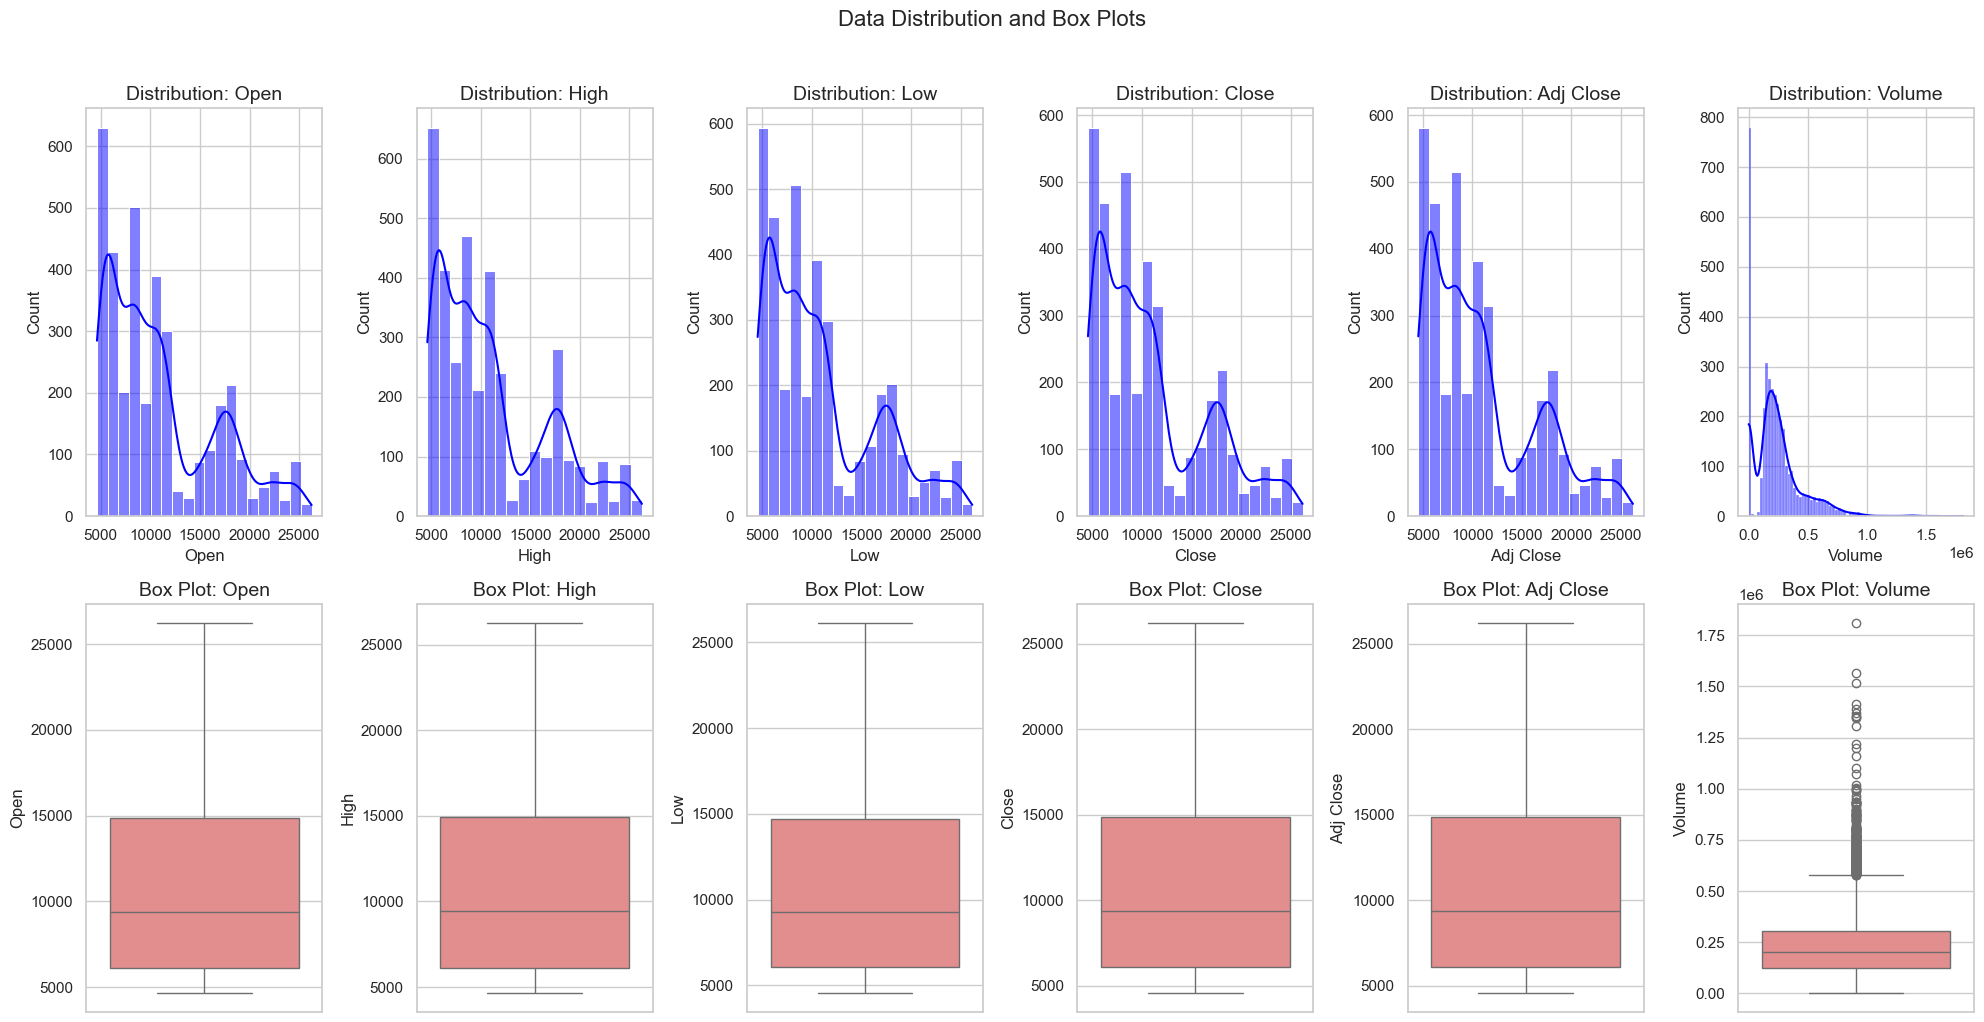

In [36]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=len(columns), figsize=(20, 10))
fig.suptitle("Data Distribution and Box Plots", fontsize=16, y=1.02)

for i, col in enumerate(columns):
    # Distribution Plot
    sns.histplot(df_copy[col], kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Distribution: {col}", fontsize=14)
    
    # Box Plot
    sns.boxplot(y=df_copy[col], ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"Box Plot: {col}", fontsize=14)

plt.tight_layout()
plt.show()

## Stock Data Over Time

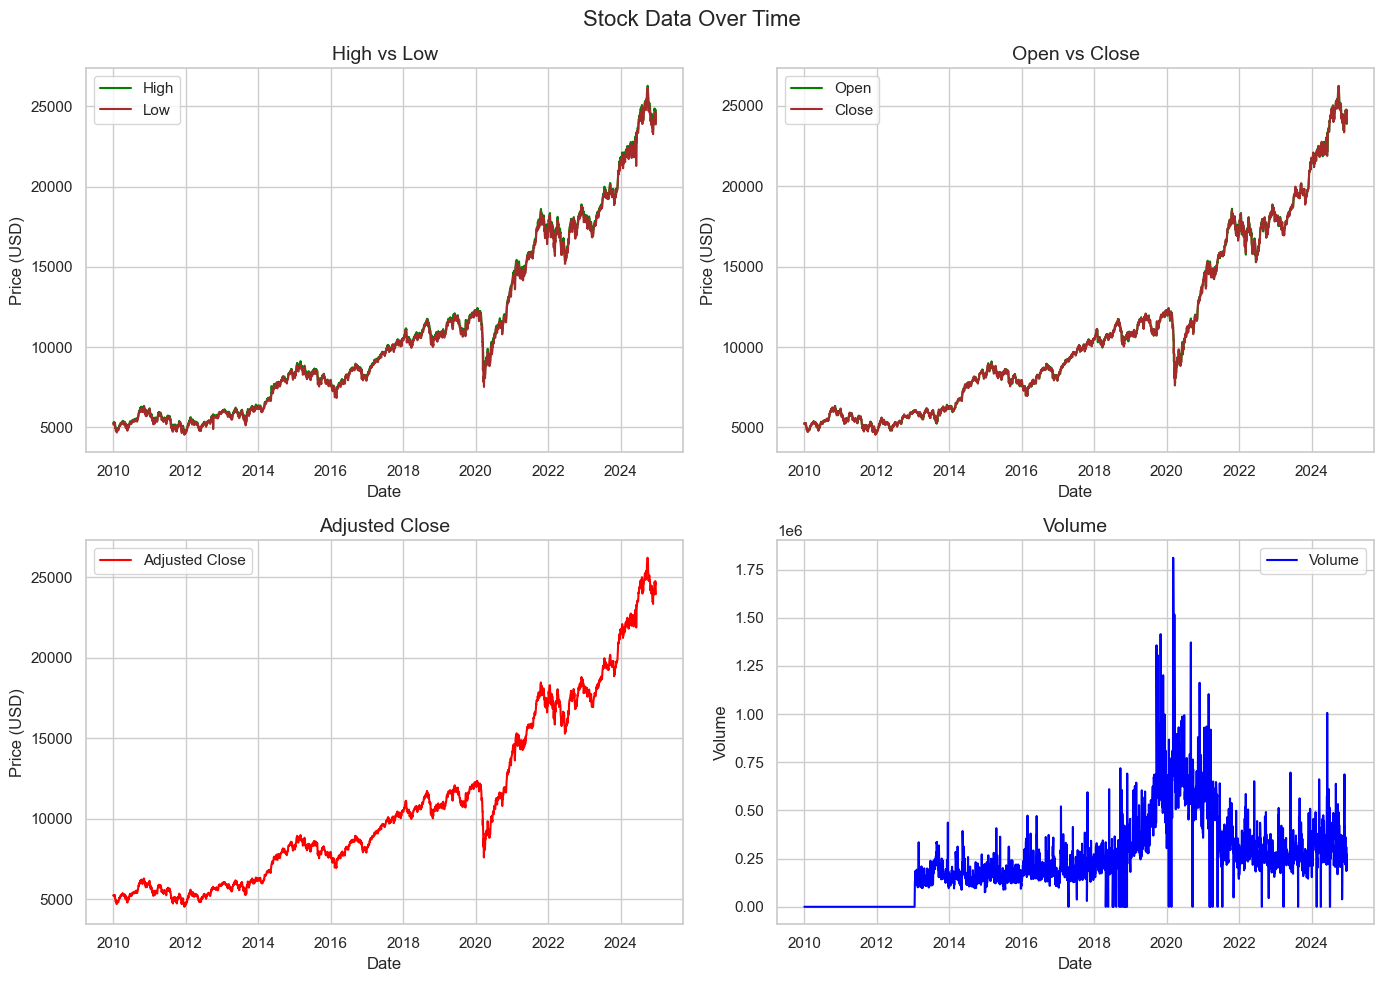

In [37]:
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Stock Data Over Time', fontsize=16)

# 1. High vs Low
axes[0, 0].plot(df_copy['Date'], df_copy['High'], color='green', label='High')
axes[0, 0].plot(df_copy['Date'], df_copy['Low'], color='brown', label='Low')
axes[0, 0].set_title('High vs Low', fontsize=14)
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Price (USD)', fontsize=12)
axes[0, 0].legend()

# 2. Open vs Close
axes[0, 1].plot(df_copy['Date'], df_copy['Open'], color='green', label='Open')
axes[0, 1].plot(df_copy['Date'], df_copy['Close'], color='brown', label='Close')
axes[0, 1].set_title('Open vs Close', fontsize=14)
axes[0, 1].set_xlabel('Date', fontsize=12)
axes[0, 1].set_ylabel('Price (USD)', fontsize=12)
axes[0, 1].legend()

# 3. Adjusted Close
axes[1, 0].plot(df_copy['Date'], df_copy['Adj Close'], color='red', label='Adjusted Close')
axes[1, 0].set_title('Adjusted Close', fontsize=14)
axes[1, 0].set_xlabel('Date', fontsize=12)
axes[1, 0].set_ylabel('Price (USD)', fontsize=12)
axes[1, 0].legend()

# 4. Volume
axes[1, 1].plot(df_copy['Date'], df_copy['Volume'], color='blue', label='Volume')
axes[1, 1].set_title('Volume', fontsize=14)
axes[1, 1].set_xlabel('Date', fontsize=12)
axes[1, 1].set_ylabel('Volume', fontsize=12)
axes[1, 1].legend()

# Adjust layout for better display
plt.tight_layout()
plt.show()

# Data Spliting

In [38]:
X = df['Date']
y_open = df['Open']             # Open price as the target
y_close = df['Close']           # Close price as the target
y_high = df['High']             # High price as the target
y_low = df['Low']               # Low price as the target
y_adjclose = df['Adj Close']    # Adj Close price as the target
y_volume = df['Volume']         # Volume as the target

In [39]:
X

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
3668   2024-12-13
3669   2024-12-16
3670   2024-12-17
3671   2024-12-18
3672   2024-12-19
Name: Date, Length: 3673, dtype: datetime64[ns]

In [40]:
X = X.astype(np.int64)

In [41]:
X

0       1262563200000000000
1       1262649600000000000
2       1262736000000000000
3       1262822400000000000
4       1262908800000000000
               ...         
3668    1734048000000000000
3669    1734307200000000000
3670    1734393600000000000
3671    1734480000000000000
3672    1734566400000000000
Name: Date, Length: 3673, dtype: int64

# Data Shuffling

In [42]:
df = df.sample(frac = 1, random_state = 42)

# Data Engineering

In [43]:
scaler = MinMaxScaler()
X = scaler.fit_transform(np.array(X).reshape(-1, 1))

y_open = scaler.fit_transform(np.array(y_open).reshape(-1, 1))
y_close = scaler.fit_transform(np.array(y_close).reshape(-1, 1))
y_high = scaler.fit_transform(np.array(y_high).reshape(-1, 1))
y_low = scaler.fit_transform(np.array(y_low).reshape(-1, 1))
y_adjclose = scaler.fit_transform(np.array(y_adjclose).reshape(-1, 1))

# Train-Test Data Split

In [44]:
X_train, X_test, y_train_open, y_test_open = train_test_split(X, y_open, test_size=0.2, random_state=42)
_, _, y_train_close, y_test_close = train_test_split(X, y_close, test_size=0.2, random_state=42)
_, _, y_train_high, y_test_high = train_test_split(X, y_high, test_size=0.2, random_state=42)
_, _, y_train_low, y_test_low = train_test_split(X, y_low, test_size=0.2, random_state=42)
_, _, y_train_adjclose, y_test_adjclose = train_test_split(X, y_adjclose, test_size=0.2, random_state=42)

# Model Training

In [45]:
# Polynomial Regression Model
poly = PolynomialFeatures(degree=2)  # You can adjust the degree of the polynomial
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the model for predicting Open price
model_open = LinearRegression()
model_open.fit(X_poly_train, y_train_open)

# Train the model for predicting Close price
model_close = LinearRegression()
model_close.fit(X_poly_train, y_train_close)

# Train the model for predicting High price
model_high = LinearRegression()
model_high.fit(X_poly_train, y_train_high)

# Train the model for predicting Low price
model_low = LinearRegression()
model_low.fit(X_poly_train, y_train_low)

# Train the model for predicting Adj Close price
model_adjclose = LinearRegression()
model_adjclose.fit(X_poly_train, y_train_adjclose)

LinearRegression()

# Prediction

In [46]:
open_price_pred = model_open.predict(poly.transform(X_train))
close_price_pred = model_close.predict(poly.transform(X_train))
high_price_pred = model_high.predict(poly.transform(X_train))
low_price_pred = model_low.predict(poly.transform(X_train))
adjclose_price_pred = model_adjclose.predict(poly.transform(X_train))

# Model Evaluation

In [47]:
# Calculate evaluation metrics for Open Price
mae_open = mean_absolute_error(y_train_open, open_price_pred)
mse_open = mean_squared_error(y_train_open, open_price_pred)
rmse_open = np.sqrt(mse_open)
r2_open = r2_score(y_train_open, open_price_pred)

# Calculate evaluation metrics for Close Price
mae_close = mean_absolute_error(y_train_close, close_price_pred)
mse_close = mean_squared_error(y_train_close, close_price_pred)
rmse_close = np.sqrt(mse_close)
r2_close = r2_score(y_train_close, close_price_pred)

# Calculate evaluation metrics for High Price
mae_high = mean_absolute_error(y_train_high, high_price_pred)
mse_high = mean_squared_error(y_train_high, high_price_pred)
rmse_high = np.sqrt(mse_high)
r2_high = r2_score(y_train_high, high_price_pred)

# Calculate evaluation metrics for Low Price
mae_low = mean_absolute_error(y_train_low, low_price_pred)
mse_low = mean_squared_error(y_train_low, low_price_pred)
rmse_low = np.sqrt(mse_low)
r2_low = r2_score(y_train_low, low_price_pred)

# Calculate evaluation metrics for Adj Close Price
mae_adjclose = mean_absolute_error(y_train_adjclose, adjclose_price_pred)
mse_adjclose = mean_squared_error(y_train_adjclose, adjclose_price_pred)
rmse_adjclose = np.sqrt(mse_adjclose)
r2_adjclose = r2_score(y_train_adjclose, adjclose_price_pred)

# Display the evaluation results
print(f"Open Price - MAE: {mae_open}, MSE: {mse_open}, RMSE: {rmse_open}, R²: {r2_open}")
print(f"Close Price - MAE: {mae_close}, MSE: {mse_close}, RMSE: {rmse_close}, R²: {r2_close}")
print(f"High Price - MAE: {mae_high}, MSE: {mse_high}, RMSE: {rmse_high}, R²: {r2_high}")
print(f"Low Price - MAE: {mae_low}, MSE: {mse_low}, RMSE: {rmse_low}, R²: {r2_low}")
print(f"Adj Close Price - MAE: {mae_adjclose}, MSE: {mse_adjclose}, RMSE: {rmse_adjclose}, R²: {r2_adjclose}")

Open Price - MAE: 0.03488007881526268, MSE: 0.0024481016602720643, RMSE: 0.04947829483998074, R²: 0.9617383177543475
Close Price - MAE: 0.034721310899350766, MSE: 0.0024277686592591597, RMSE: 0.04927239246534675, R²: 0.9618472050069128
High Price - MAE: 0.034703842248387594, MSE: 0.0024075867774046547, RMSE: 0.04906716598097607, R²: 0.9625254404421025
Low Price - MAE: 0.03490889390620195, MSE: 0.0024695913306041974, RMSE: 0.04969498295204655, R²: 0.9610268408938477
Adj Close Price - MAE: 0.034721310899350766, MSE: 0.0024277686592591597, RMSE: 0.04927239246534675, R²: 0.9618472050069128


# Actual vs Predicted Values For Each Feature

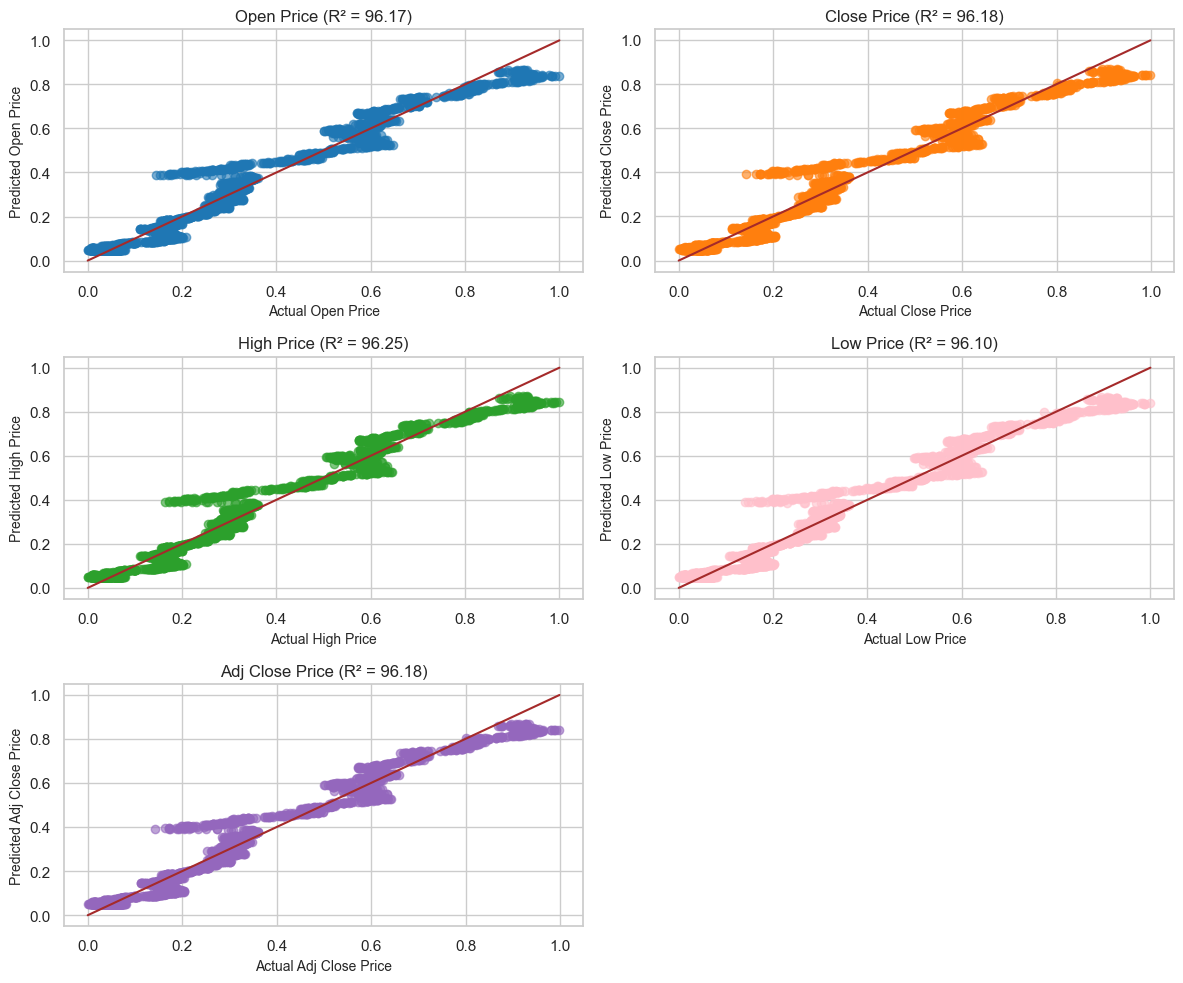

In [48]:
y_actual_open = y_train_open  # Actual Open prices
y_predicted_open = open_price_pred  # Predicted Open prices

y_actual_close = y_train_close  # Actual Close prices
y_predicted_close = close_price_pred  # Predicted Close prices

y_actual_high = y_train_high  # Actual High prices
y_predicted_high = high_price_pred  # Predicted High prices

y_actual_low = y_train_low  # Actual Low prices
y_predicted_low = low_price_pred  # Predicted Low prices

y_actual_adjclose = y_train_adjclose  # Actual Adj Close prices
y_predicted_adjclose = adjclose_price_pred  # Predicted Adj Close prices

# Calculate R² for each feature
r2_open = r2_score(y_actual_open, y_predicted_open) * 100.00
r2_close = r2_score(y_actual_close, y_predicted_close) * 100.00
r2_high = r2_score(y_actual_high, y_predicted_high) * 100.00
r2_low = r2_score(y_actual_low, y_predicted_low) * 100.00
r2_adjclose = r2_score(y_actual_adjclose, y_predicted_adjclose) * 100.00

# Create the figure for plotting
plt.figure(figsize=(12, 10))

# Scatter plot for each feature with actual vs predicted values
plt.subplot(3, 2, 1)
plt.scatter(y_actual_open, y_predicted_open, color='#1f77b4', alpha=0.6)  
plt.plot([min(y_actual_open), max(y_actual_open)], [min(y_actual_open), max(y_actual_open)], color='brown', linestyle='-')
plt.title(f'Open Price (R² = {r2_open:.2f})', fontsize=12)
plt.xlabel('Actual Open Price', fontsize=10)
plt.ylabel('Predicted Open Price', fontsize=10)

plt.subplot(3, 2, 2)
plt.scatter(y_actual_close, y_predicted_close, color='#ff7f0e', alpha=0.6)  
plt.plot([min(y_actual_close), max(y_actual_close)], [min(y_actual_close), max(y_actual_close)], color='brown', linestyle='-')
plt.title(f'Close Price (R² = {r2_close:.2f})', fontsize=12)
plt.xlabel('Actual Close Price', fontsize=10)
plt.ylabel('Predicted Close Price', fontsize=10)

plt.subplot(3, 2, 3)
plt.scatter(y_actual_high, y_predicted_high, color='#2ca02c', alpha=0.6)  
plt.plot([min(y_actual_high), max(y_actual_high)], [min(y_actual_high), max(y_actual_high)], color='brown', linestyle='-')
plt.title(f'High Price (R² = {r2_high:.2f})', fontsize=12)
plt.xlabel('Actual High Price', fontsize=10)
plt.ylabel('Predicted High Price', fontsize=10)

plt.subplot(3, 2, 4)
plt.scatter(y_actual_low, y_predicted_low, color='#FFC0CB', alpha=0.6)  
plt.plot([min(y_actual_low), max(y_actual_low)], [min(y_actual_low), max(y_actual_low)], color='brown', linestyle='-')
plt.title(f'Low Price (R² = {r2_low:.2f})', fontsize=12)
plt.xlabel('Actual Low Price', fontsize=10)
plt.ylabel('Predicted Low Price', fontsize=10)

plt.subplot(3, 2, 5)
plt.scatter(y_actual_adjclose, y_predicted_adjclose, color='#9467bd', alpha=0.6)  
plt.plot([min(y_actual_adjclose), max(y_actual_adjclose)], [min(y_actual_adjclose), max(y_actual_adjclose)], color='brown', linestyle='-')
plt.title(f'Adj Close Price (R² = {r2_adjclose:.2f})', fontsize=12)
plt.xlabel('Actual Adj Close Price', fontsize=10)
plt.ylabel('Predicted Adj Close Price', fontsize=10)

# Adjust layout for tight spacing
plt.tight_layout()
plt.show()